# Regression 2 

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

## Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

## Read Data

In [2]:
data = pd.read_csv("assignment2_data.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
y = data['Price'] ## target
X = data.drop(['Price'], axis=1)

data_name = data['Name']

del data['Name'], data['Unnamed: 0']

## Missing Values

In [4]:
print('data 결측치 비율 \n')

for col in X.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * X[col].isnull().sum() / X[col].shape[0])
    print(msg)

data 결측치 비율 

column: Unnamed: 0	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:   Location	 Percent of NaN value: 0.00%
column:       Year	 Percent of NaN value: 0.00%
column: Kilometers_Driven	 Percent of NaN value: 0.00%
column:  Fuel_Type	 Percent of NaN value: 0.00%
column: Transmission	 Percent of NaN value: 0.00%
column: Owner_Type	 Percent of NaN value: 0.00%
column:    Mileage	 Percent of NaN value: 0.03%
column:     Engine	 Percent of NaN value: 0.60%
column:      Power	 Percent of NaN value: 0.60%
column:      Seats	 Percent of NaN value: 0.70%
column:  New_Price	 Percent of NaN value: 86.31%


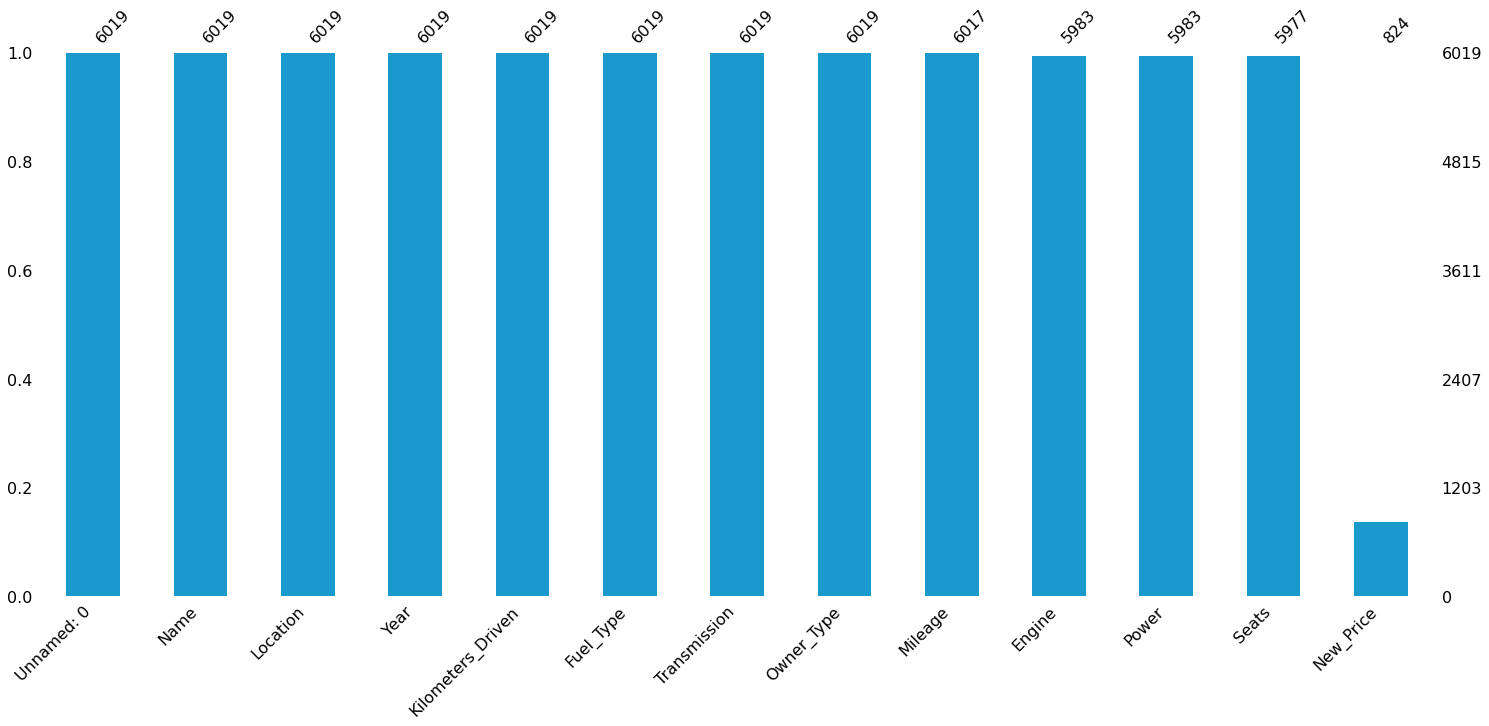

In [5]:
import missingno as msno
msno.bar(df=X, color=(0.1, 0.6, 0.8))
plt.show()

In [6]:
del X['New_Price']

## 결측치가 너무 많아서 삭제

## Target Distribution

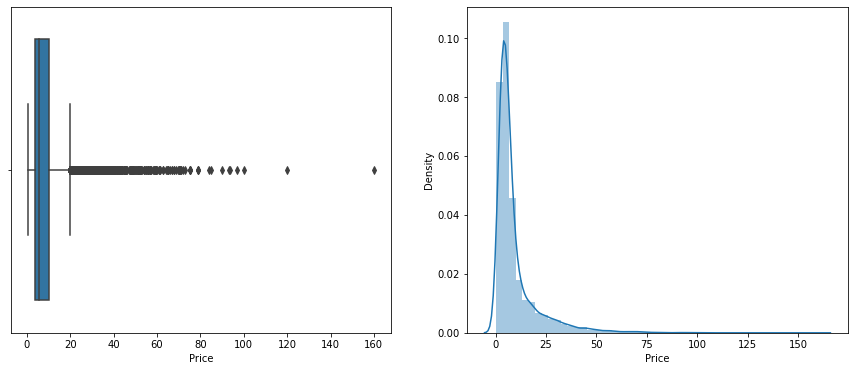

In [7]:
f, ax = plt.subplots(1,2, figsize = (15,6))

sns.boxplot(y, ax=ax[0])
sns.distplot(y, ax=ax[1])
plt.show()

In [8]:
#### 왼쪽으로 치우쳐진 positive skewed 분포/ log 변환을 통하여 정규분포 형태로 만들어준다.

#### log-transform

In [9]:
log_price = np.log1p(y)

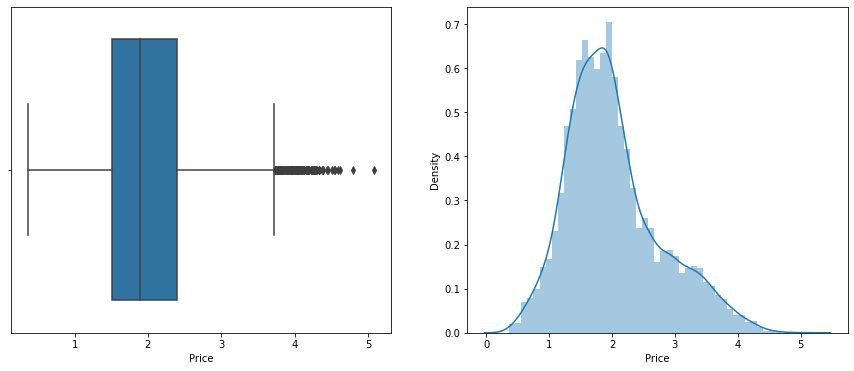

In [10]:
f, ax = plt.subplots(1,2, figsize = (15,6))

sns.boxplot(log_price, ax=ax[0])
sns.distplot(log_price, ax=ax[1])
plt.show()

- log transform 이후 정규분포에 가까워짐.

## Data Preprocessing

In [11]:
cat_features = X.select_dtypes(include=['object']).columns.to_list()

num_features = X.select_dtypes(exclude=['object']).columns.to_list()

### Impute Missing Values

In [12]:
from sklearn.impute import SimpleImputer 

if len(num_features) > 0:
    X[num_features] = SimpleImputer(strategy = 'constant', fill_value=0).fit_transform(X[num_features])
    
if len(cat_features) > 0:
    X[cat_features] = SimpleImputer(strategy = 'most_frequent', fill_value=0).fit_transform(X[cat_features])
    
X

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,0.0,Maruti Wagon R LXI CNG,Mumbai,2010.0,72000.0,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0
1,1.0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015.0,41000.0,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0
2,2.0,Honda Jazz V,Chennai,2011.0,46000.0,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0
3,3.0,Maruti Ertiga VDI,Chennai,2012.0,87000.0,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0
4,4.0,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013.0,40670.0,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014.0,Maruti Swift VDI,Delhi,2014.0,27365.0,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0
6015,6015.0,Hyundai Xcent 1.1 CRDi S,Jaipur,2015.0,100000.0,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0
6016,6016.0,Mahindra Xylo D4 BSIV,Jaipur,2012.0,55000.0,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0
6017,6017.0,Maruti Wagon R VXI,Kolkata,2013.0,46000.0,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0


#### numerical variable은 0 / categorical variable은 0

### Encoding Categorical Variables

In [13]:
if len(cat_features) > 0:
    X = pd.concat([X[num_features], pd.get_dummies(X[cat_features])], axis=1)
else:
    X = X[num_features]

X

,Unnamed: 0,Year,Kilometers_Driven,Seats,Name_Ambassador Classic Nova Diesel,Name_Audi A3 35 TDI Attraction,Name_Audi A3 35 TDI Premium,Name_Audi A3 35 TDI Premium Plus,Name_Audi A3 35 TDI Technology,Name_Audi A4 1.8 TFSI,...,Power_97.6 bhp,Power_97.7 bhp,Power_98.59 bhp,Power_98.6 bhp,Power_98.79 bhp,Power_98.82 bhp,Power_98.96 bhp,Power_99 bhp,Power_99.6 bhp,Power_null bhp
0,0.0,2010.0,72000.0,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,2015.0,41000.0,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,2011.0,46000.0,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,2012.0,87000.0,7.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.0,2013.0,40670.0,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014.0,2014.0,27365.0,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6015,6015.0,2015.0,100000.0,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6016,6016.0,2012.0,55000.0,8.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6017,6017.0,2013.0,46000.0,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### one-hot encoding을 통해 categorical variable을 정수형태로 변환

### feature correlation

Displaying absolute correlations above the threshold (0.3). Specify a positive "threshold" to limit the results further.


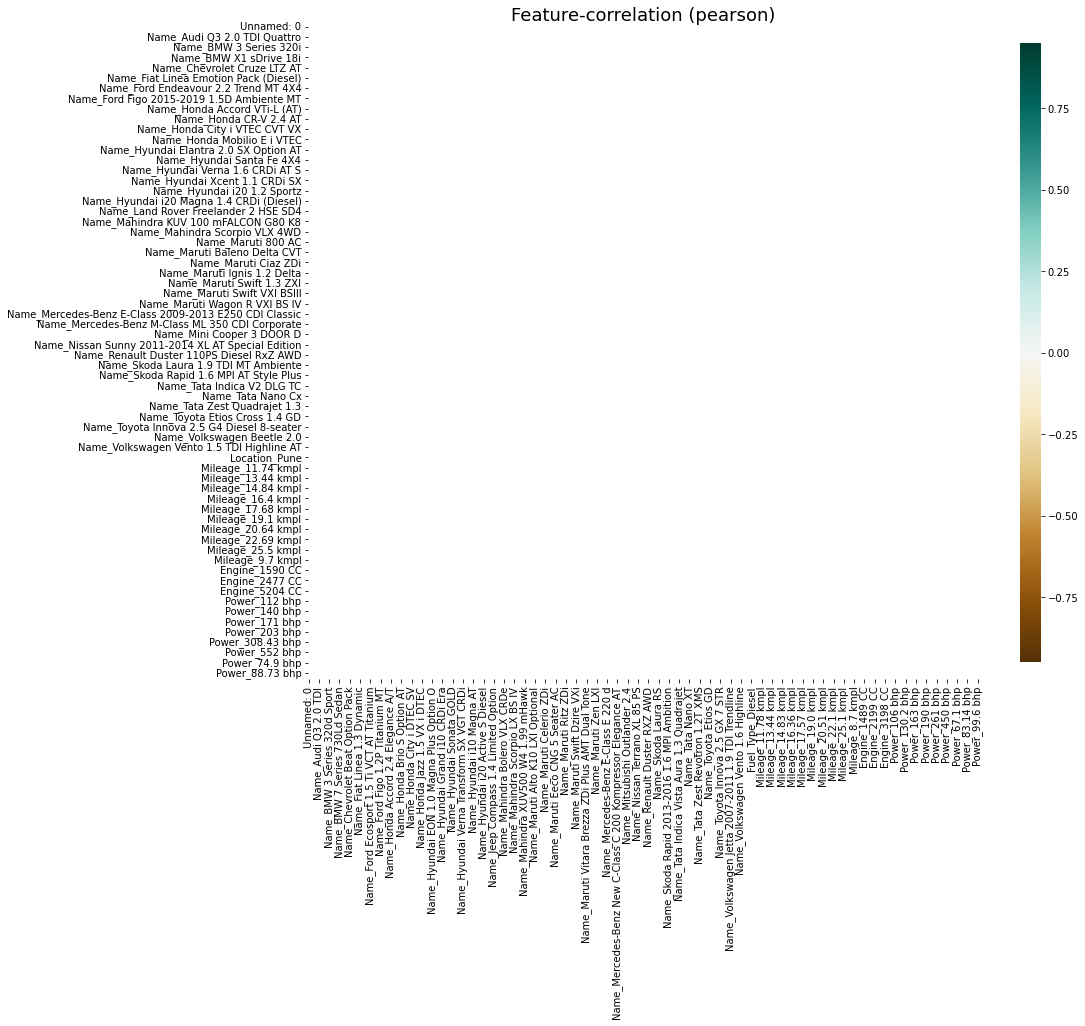

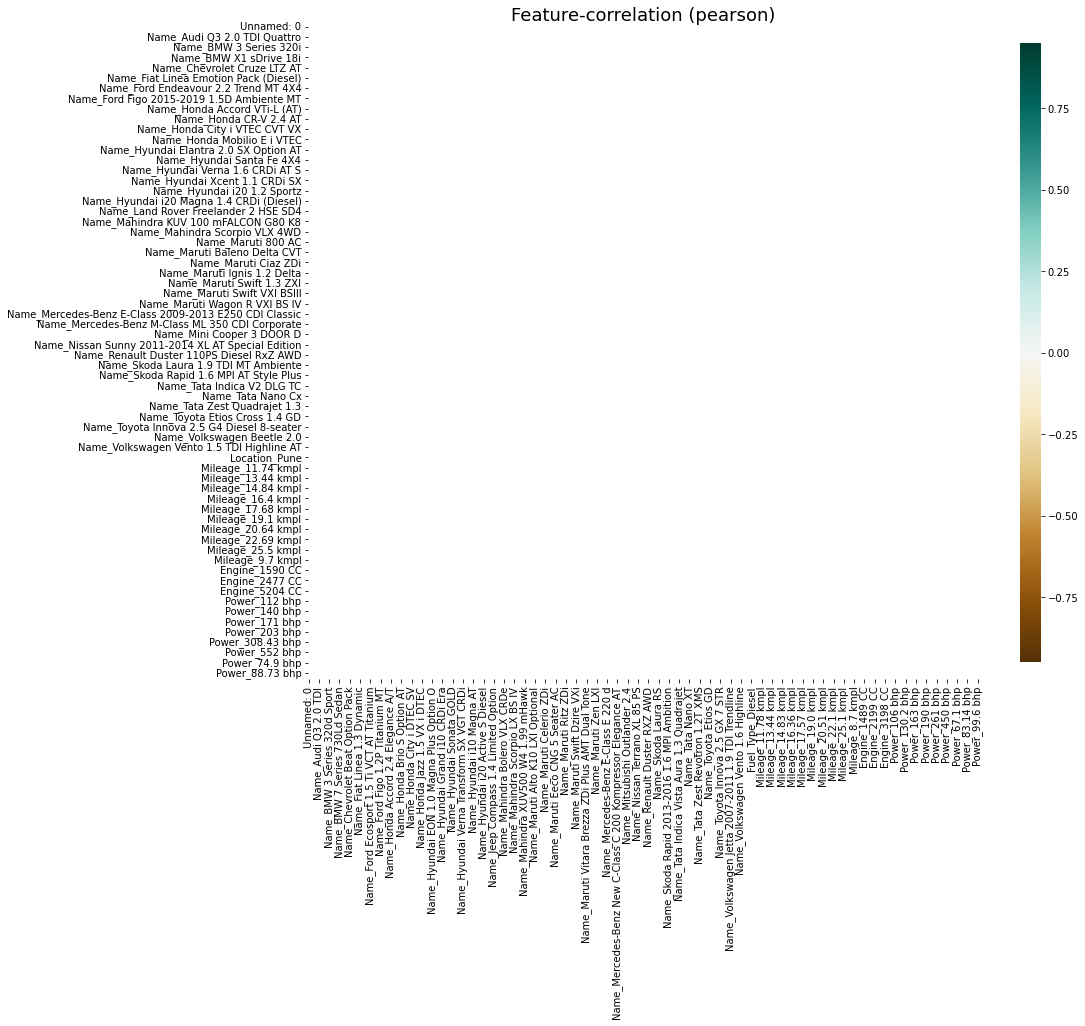

In [14]:
import klib

klib.corr_plot(X, annot = False, figsize=(15,12))
klib.corr_plot(X, split='high', annot = False, figsize=(15,12))
plt.show()

### target - feature correlation

In [15]:
data.corr()['Price'].sort_values(ascending=False)

Price                1.000000
Year                 0.305327
Seats                0.052225
Kilometers_Driven   -0.011493
Name: Price, dtype: float64

#### 빨간선을 잘 따라가는것을 보임

### train / test split

In [17]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,log_price,test_size=0.2,random_state=2021)

### Statstic Modeling

In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

X_train=sm.add_constant(X_train) #beta_0 값이 될 변수 만들기
model=sm.OLS(y_train,X_train,axis=1)
model_trained=model.fit()

#### Normality Test

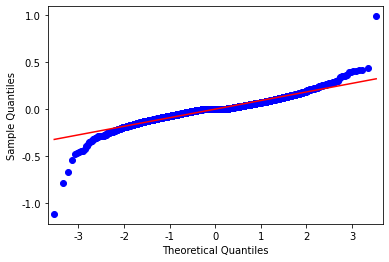

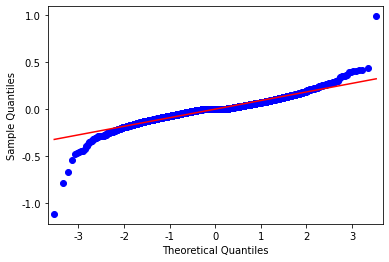

In [21]:
model_residuals = model_trained.resid

plt.rcParams['axes.unicode_minus'] = False
sm.ProbPlot(model_residuals).qqplot(line='s')

####  < 선을 따라 잘 분포되어있음 - 정규성 >

#### Homogeneity of variance test

Text(0, 0.5, 'residuals')

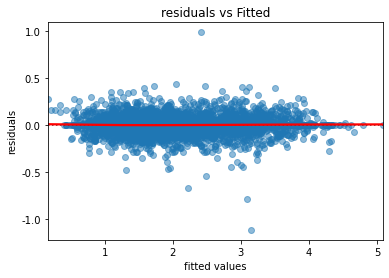

In [22]:
model_fitted_y = model_trained.fittedvalues

sns.residplot(model_fitted_y, y_train, data=X_train, lowess=True, scatter_kws = {'alpha':0.5}, line_kws={'color':'red'})

plt.title('residuals vs Fitted')
plt.xlabel('fitted values')
plt.ylabel('residuals')

#### < 잔차들이 선을 따라 잘 분포되어 있음 - 등분산성 >

#### 선을 따라 잘 분포되어 있음 - 등분산성 

In [23]:
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     107.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:21:56   Log-Likelihood:                 4685.3
No. Observations:                4815   AIC:                            -5749.
Df Residuals:                    3004   BIC:                             5986.
Df Model:                        1810                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

### Target Prediction

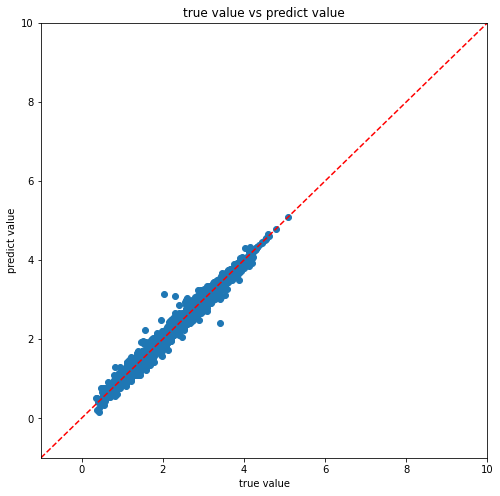

In [24]:
#train하는 부분
y_train_pred=model_trained.fittedvalues

plt.figure(figsize=(8,8))
plt.title("true value vs predict value")
plt.scatter(y_train,y_train_pred)
plt.plot([-1,10],[-1,10],ls="--",c="red")
plt.xlabel("true value")
plt.ylabel("predict value")
plt.xlim(-1,10)
plt.ylim(-1,10)
plt.show()

#### (line = True Value / dot = Predict Value) 
#### 선을 따라 점들이 잘 분포되어 있음 = 예측값과 실제값이 비슷함

#### test data 학습 진행

In [25]:
X_test = sm.add_constant(X_test)

In [26]:
y_test_pred=model_trained.predict(X_test)
y_test_pred.head()

901     2.039004
2730    1.830554
1264    3.074177
5416    4.236346
3551    0.891461
dtype: float64

#### R-squared

In [27]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

print(r2_score(y_test,y_test_pred))

0.5735636238227089


#### MSE

In [28]:
print(mean_squared_error(y_test,y_test_pred))

0.25763552283565455


#### R-MSE

In [29]:
print(np.sqrt(mean_squared_error(y_test,y_test_pred)))

0.50757809530717


#### MAE

In [30]:
print(mean_absolute_error(y_test,y_test_pred))

0.1575830740219619


#### MAPE

In [31]:
def mean_absolute_percentage_error(y_true,y_pred):
  y_true,y_pred=np.array(y_true),np.array(y_pred)
  return np.mean(np.abs((y_true-y_pred)/y_true))*100

print(mean_absolute_error(y_test,y_test_pred))

0.1575830740219619


In [32]:
print("Training MSE : {:.3f}".format(mean_squared_error(y_train,y_train_pred)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(y_train,y_train_pred))))
print("Training MAE : {:.3f}".format(mean_absolute_error(y_train,y_train_pred)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(y_train,y_train_pred)))
print("Training R2 : {:.3f}".format(r2_score(y_train,y_train_pred)))

Training MSE : 0.008
Training RMSE : 0.091
Training MAE : 0.059
Training MAPE : 3.423
Training R2 : 0.985


In [33]:
print("Testing MSE : {:.3f}".format(mean_squared_error(y_test,y_test_pred)))
print("Testing RMSE : {:.3f}".format(np.sqrt(mean_squared_error(y_test,y_test_pred))))
print("Testing MAE : {:.3f}".format(mean_absolute_error(y_test,y_test_pred)))
print("Testing MAPE : {:.3f}".format(mean_absolute_percentage_error(y_test,y_test_pred)))
print("Testing R2 : {:.3f}".format(r2_score(y_test,y_test_pred)))

Testing MSE : 0.258
Testing RMSE : 0.508
Testing MAE : 0.158
Testing MAPE : 9.086
Testing R2 : 0.574


### Remove Homogeneity of Variance
#### L1 : Lasso Regression / L2 : Ridge Regression

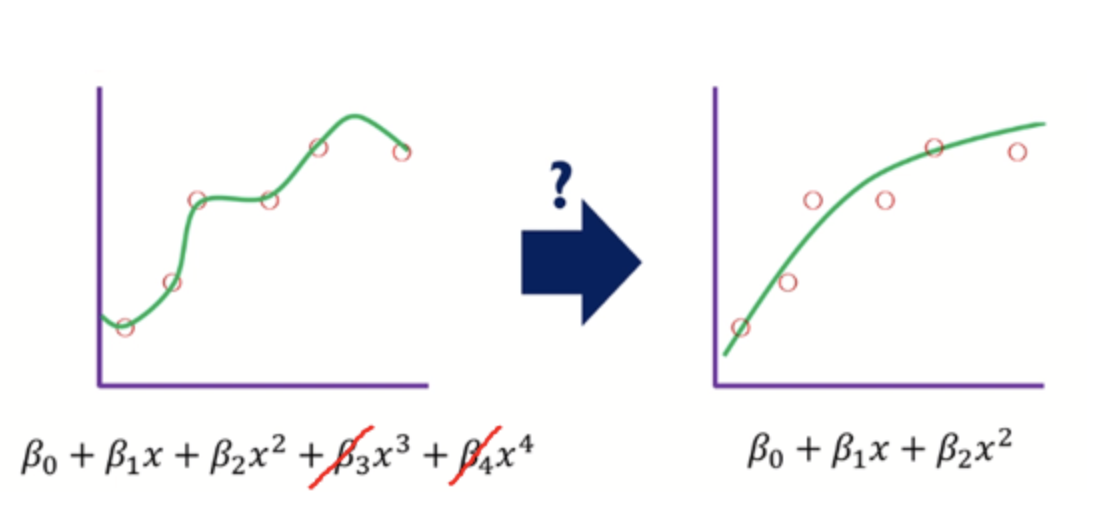

In [4]:
from IPython.display import Image
Image('/Users/jody/Downloads/Tobigs/투빅스 2주차/Regression/과제/Regularization.png')

- 높은 차수의 $\beta$값을 줄여주면서 Regularization을 진행

### Ridge
- 정규화를 이용한 shrinkage
- Training Accuracy에 Generalization 추가
- 회귀계수에 제약을 검.

In [34]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=0.01)
ridge.fit(X_train, y_train)
ridge.score(X_train, y_train)

0.9847455055248553

In [35]:
ridge.score(X_train, y_train)

0.9847455055248553

#### < 특성의 중요도가 전체적으로 비슷하다고 판단되고 non-sparse model으로 보여지기 때문에 L2규제인 Ridge규제가 더 좋아보인다 >

### Lasso
- Ridge와 비슷하나 penalty항으로 회귀계수의 절댓값의 합을 이용

In [36]:
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
lasso.score(X_train,y_train)

0.6802823001765648

### ElasticNet

In [37]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.01, l1_ratio=0.01)
elastic.fit(X_train, y_train)
elastic.score(X_train, y_train)

0.8500271981819977

#### < L1의 비율을 낮출수록 성능이 더 좋아짐 - L2 규제가 더 성능을 높임 >

### Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [39]:
lr_skl=LinearRegression(fit_intercept=False)
lr_skl.fit(X_train,y_train)
y_pred_skl=lr_skl.predict(X_test)

lr_stat=sm.OLS(y_train,X_train).fit()
y_pred_stat=lr_stat.predict(X_test)

In [40]:
#statModel 결과
test_mse_stat=mean_squared_error(y_test,y_pred_stat)
test_rmse_stat=np.sqrt(mean_squared_error(y_test,y_pred_stat))
test_mae_stat=mean_absolute_error(y_test,y_pred_stat)
test_mape_stat=mean_absolute_percentage_error(y_test,y_pred_stat)
test_r2_stat=r2_score(y_test,y_pred_stat)

print("Testing MSE : {:.3f}".format(test_mse_stat))
print("Testing RMSE : {:.3f}".format(test_rmse_stat))
print("Testing MAE : {:.3f}".format(test_mae_stat))
print("Testing MAPE : {:.3f}".format(test_mape_stat))
print("Testing R2 : {:.3f}".format(test_r2_stat))

Testing MSE : 0.258
Testing RMSE : 0.508
Testing MAE : 0.158
Testing MAPE : 9.086
Testing R2 : 0.574


In [41]:
#Sklearn 결과
test_mse_skl=mean_squared_error(y_test,y_pred_skl)
test_rmse_skl=np.sqrt(mean_squared_error(y_test,y_pred_skl))
test_mae_skl=mean_absolute_error(y_test,y_pred_skl)
test_mape_skl=mean_absolute_percentage_error(y_test,y_pred_skl)
test_r2_skl=r2_score(y_test,y_pred_skl)

print("Testing MSE : {:.3f}".format(test_mse_skl))
print("Testing RMSE : {:.3f}".format(test_rmse_skl))
print("Testing MAE : {:.3f}".format(test_mae_skl))
print("Testing MAPE : {:.3f}".format(test_mape_skl))
print("Testing R2 : {:.3f}".format(test_r2_skl))

Testing MSE : 7480968876.131
Testing RMSE : 86492.594
Testing MAE : 23417.240
Testing MAPE : 1319844.393
Testing R2 : -12382443315.512
